# Exploratory Data Analysis

In this notebook, I'll conduct EDA on the dataset to understand the following:
- Descriptive Analytics - What dataset am I dealing with and who are these users?
- Diagnostics Analytics - Why are the users churning?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

## Preprocessing Data

I'll load the dataset, clean it up and slice them to facilitate simple descriptive analytics

In [3]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

In [118]:
# Drop irrelevant attributes
df1 = df.drop(['customerID'],axis=1)

# Convert empty strings to none values
df1['TotalCharges'] = df1['TotalCharges'].replace(" ",None).dropna().apply(lambda x:float(x))

# drop all NaN values
df1 = df1.dropna()

print(f"""
Number of Attributes: {len(df.columns)} 
NUmber of Observations: {len(df)} 
Number of Unique Users: {df.customerID.nunique()}
""")

df1.head()


Number of Attributes: 21 
NUmber of Observations: 7043 
Number of Unique Users: 7043



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


There are quite a few attributes within the dataset, 21 to be exact. I'll drop those that are not relevant to us.

*CustomerID*: Since the dataset has 7043 rows, and the number of unique CustomerID are 7043, this mean that each row is a unique user and 'CustomerID' is irrelevant to us for futher exploration.

## Descriptive Analytics

I'll first observe the ratio of churn outcomes, our dependent variable. If the count of either class is much higher than the other, that means we have a classic case of class imbalance, something quite common in churn predictions.

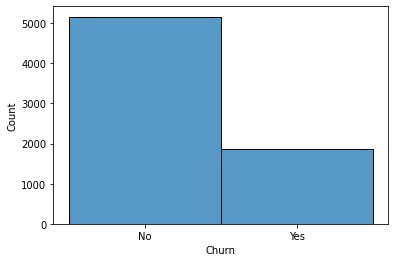

In [121]:
sns.histplot(data=df1, x='Churn');

#### Demographics
1. Gender Distribution
2. Proportionof Senior Citizens
3. Partners and Dependents

1. Gender Distribution

*How is gender distributed among the dataset?*

The ratio of female to male is largely similar

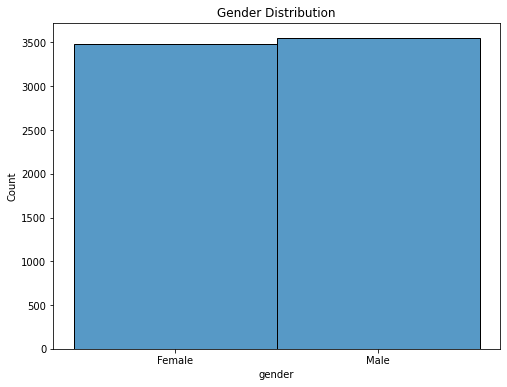

In [120]:
gender_fig, gender_ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df1,x='gender',ax=gender_ax)
gender_ax.set_title("Gender Distribution");

2. Senior Citizens

*What proportion of our user group are senior citizens?*

There are only 16% of customers who are senior citizens. Majority of the customers belong to age groups of younger adults.

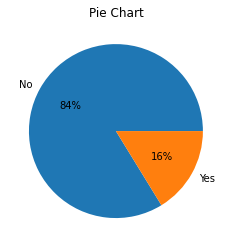

In [143]:
sc_fig, sc_ax = plt.subplots(figsize=(5,4))
plt.pie(df1.SeniorCitizen.value_counts(),labels=['No','Yes'],autopct='%.0f%%');
sc_ax.set_title("Pie Chart");

3. Partners & Dependents

*What is the partner distribution, and are there further variance in distribution for those who have partners?*

- Distribution of partners among the customers are largely similar
- However, much more customers who have dependents have depedents

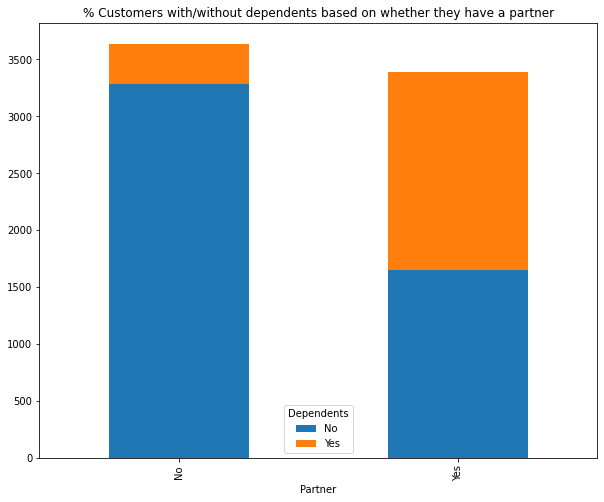

In [139]:
partner_fig, partner_ax = plt.subplots(figsize=(10,8))
df1.groupby(['Partner','Dependents']).size().unstack().plot(kind='bar',stacked=True,ax=partner_ax)
partner_ax.set_title('% Customers with/without dependents based on whether they have a partner');

#### Customer Account Details
1. Tenure
2. Contracts

1. Tenure

*How long have the customers been with the company?*

A huge proportion of the users have been with the telco company for a couple of months. There's also a sizeable number of customers who been with the company for more than 70 months. Their length of tenure could be due to the contracts that they have, which we can likewise observe.

**Month-to-month**
Customers who are under this contract have a much shorter tenure (less than 1 year). These users are more likely to change their telcos.

**One year**
Customers who are under a yearly contract do not have much variance in their tenure.

**Two year**
Customers who are under a 2-yearly contract have a much higher tenure (opposite skew compared to Month-to-month). These users are likely more prone to stick to a Telco company once they have identified and contracted one.

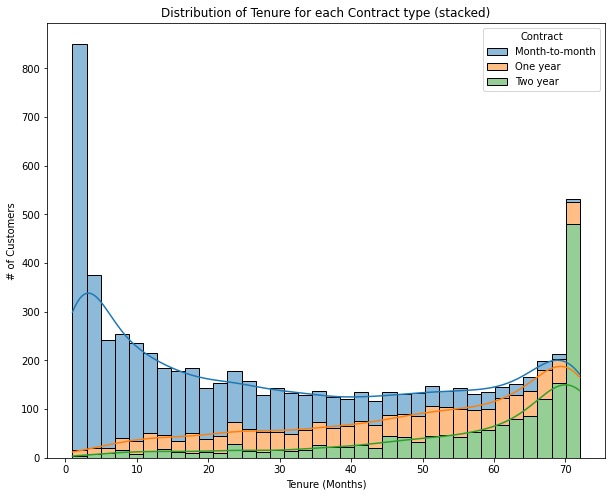

In [125]:
tenure_fig, tenure_ax = plt.subplots(figsize=(10,8))
tenure_ax = sns.histplot(data=df1, x='tenure',multiple='stack', hue='Contract', kde=True,bins=36)
tenure_ax.set_xlabel("Tenure (Months)")
tenure_ax.set_ylabel("# of Customers")
tenure_ax.set_title("Distribution of Tenure for each Contract type (stacked)");

2. Contract Types

*What is the proportion of contract types among the customers?*

Month-to-month contracts are the most popular among customers, with yearly or 2-yearly contracts still reasonably popular.

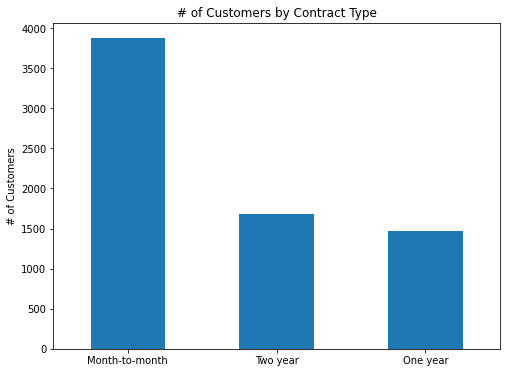

In [145]:
contract_fig, contract_ax = plt.subplots(figsize=(8,6))
contract_ax = df1.Contract.value_counts().plot(kind='bar',rot=0)
contract_ax.set_title("# of Customers by Contract Type")
contract_ax.set_ylabel("# of Customers");

#### Services Used



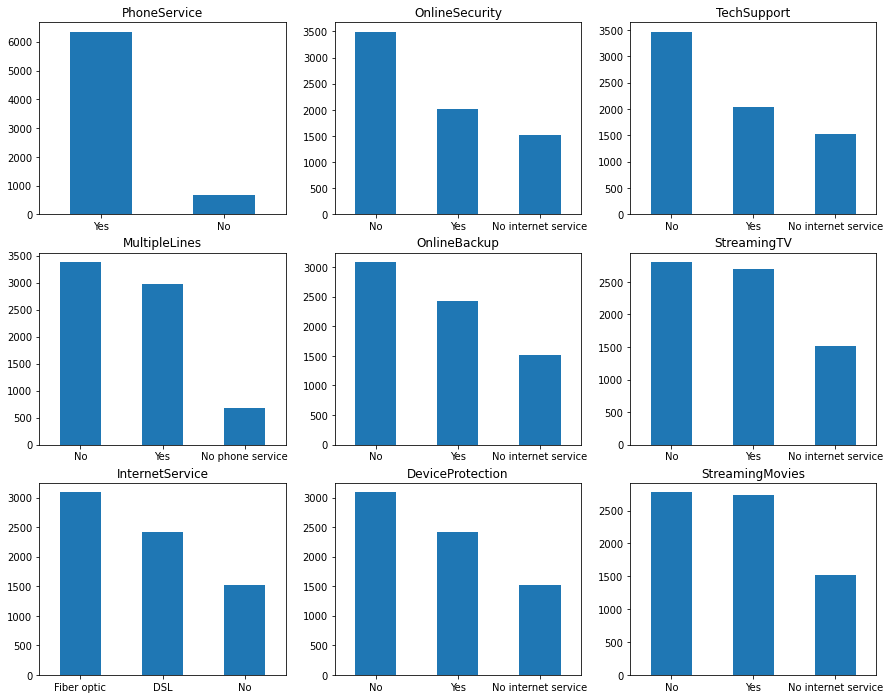

In [127]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

#### Monthly vs Total Charges

*How does monthly vary with total charges for the customers?*

We will observe that the total charges increases as the monthly bill for a customer increases, which supports a logical reasoning. This pattern is mostly observed for customers who continued to stay with the Telco company. Customers who churned tend to have a higher monthly charges but low total charges.

Text(0.5, 1.0, 'Monthly vs Total Charges broken down by Churn Outcomes')

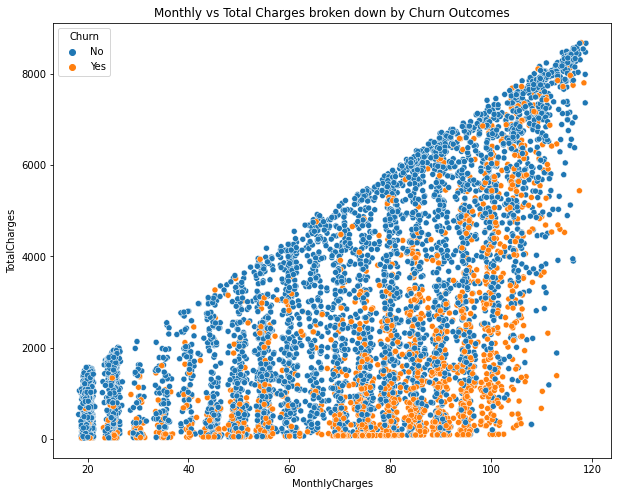

In [148]:
charges_fig, charges_ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df1,x='MonthlyCharges',y='TotalCharges',hue='Churn',ax=charges_ax)
charges_ax.set_title("Monthly vs Total Charges broken down by Churn Outcomes")

If we differentiate the customers by contracts, this pattern becomes even more distinct. Customers who are under yearly or 2-yearly contract have a linear relationship between monthly and total charges, whereas this is linearity isn't observed for customers on month-to-montht contract

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

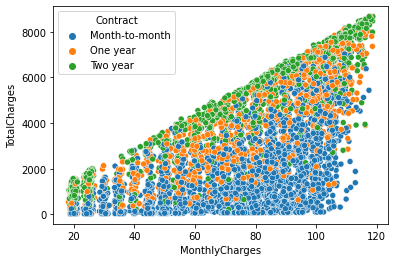

In [134]:
sns.scatterplot(data=df1,x='MonthlyCharges',y='TotalCharges',hue='Contract')

#### Churn Distribution with Categorical Variables
Plotting categorical variables to look at variation of users who churn within these categories

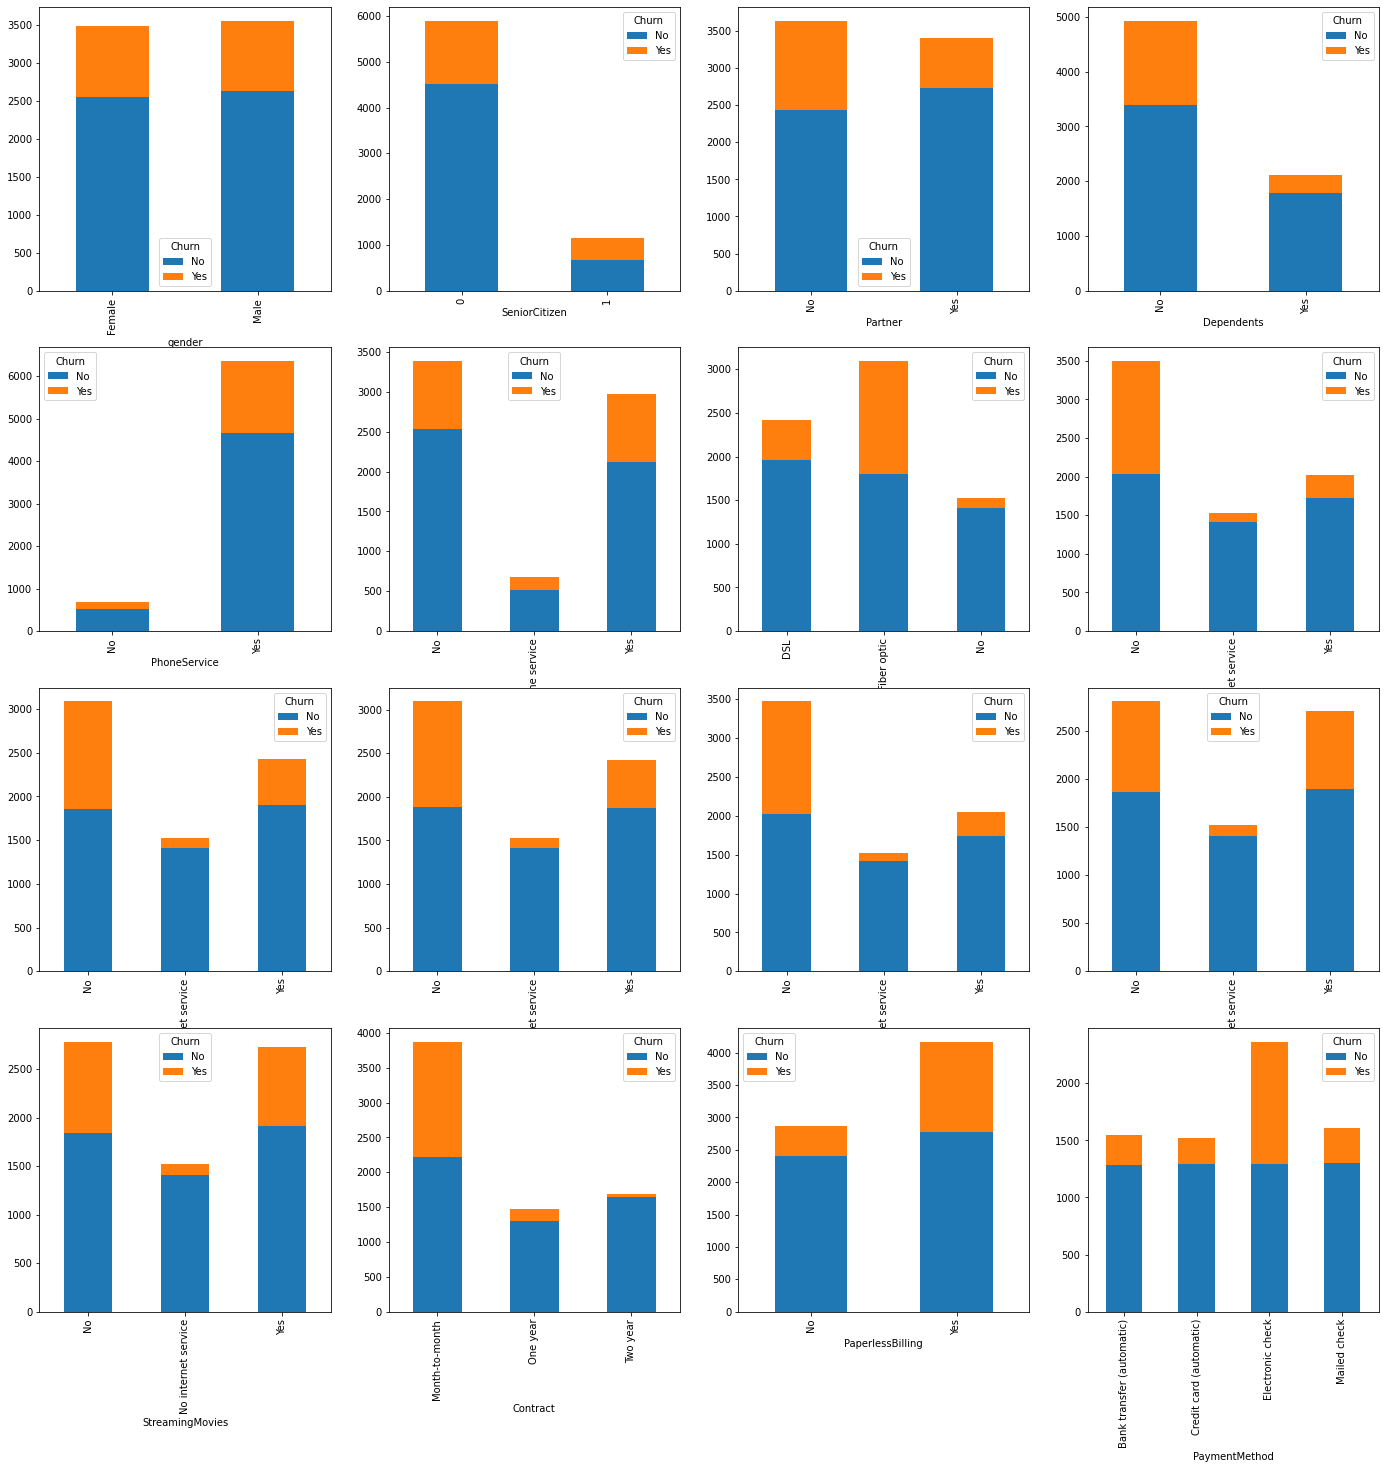

In [24]:
cat_covariates = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4, 4, sharey=False, figsize=(24,24))

for i in enumerate(cat_covariates[:4]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[0,i[0]])

for i in enumerate(cat_covariates[4:8]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[1,i[0]])

for i in enumerate(cat_covariates[8:12]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[2,i[0]])

for i in enumerate(cat_covariates[12:]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[3,i[0]])

#### Churn Distribution with Continuous Variables

Plotting continous variables to look at variation of users who churned

In [25]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

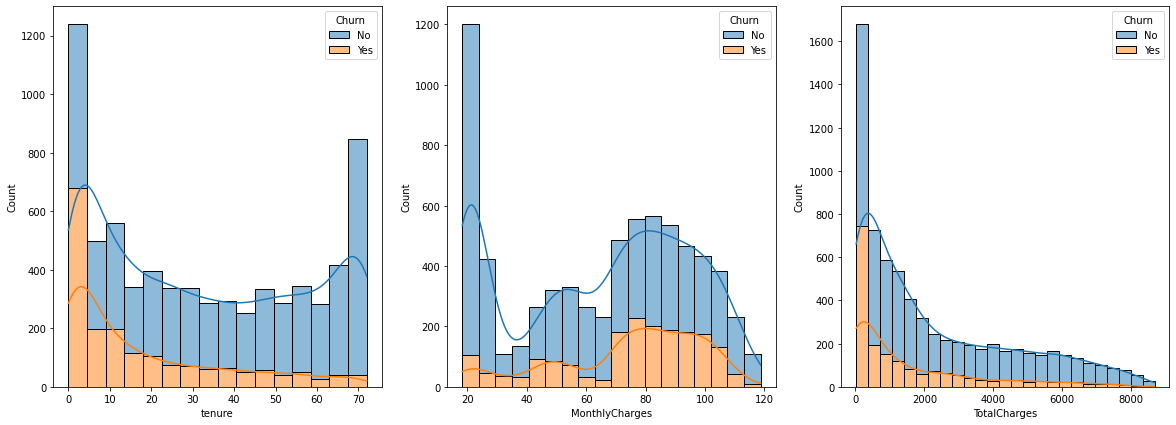

In [27]:
cont_covariates = ['tenure','MonthlyCharges','TotalCharges']

fig, axes = plt.subplots(1,3, sharey=False, figsize=(20,7))

for i in enumerate(cont_covariates):
    sns.histplot(data=df1, x=df1[i[1]], multiple="stack", hue=df1['Churn'], kde=True, ax=axes[i[0]]);


## Discussion Points

Looking at the descriptive exploration of categorical and continuous independent variables against the dependent variable (churn), we can observe that most of the variables have substantial variable and hence are potentially good predictors of churn. We will proceed to use all of these features for our modelling. 